In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("")))))
from src.pre_process.V4.feature_add import FeatureAddition
from src.pre_process.V4.feature_duplicate import FeatureDuplication

In [16]:
BASE_PATH = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\etc'
BASE_PATH2 = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\processed'
data = pd.read_csv(os.path.join(BASE_PATH2,'v9_real.csv'))
near_apt = pd.read_csv(os.path.join(BASE_PATH,'nearest_apt_deposit.csv'))
sample_submission = pd.read_csv(os.path.join(BASE_PATH, 'sample_submission.csv'))

---

# data 확인

In [19]:
BASE_PATH3 = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\output'
df = pd.read_csv(os.path.join(BASE_PATH3,'v10_xgb.csv'))

In [20]:
df.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,39355.723844
std,43351.06665,24478.586657
min,0.00000,2564.034375
25%,37542.75000,23366.402734
50%,75085.50000,34210.800000
75%,112628.25000,48764.524023
max,150171.00000,662091.262500


In [21]:
df2 = pd.read_csv(os.path.join(BASE_PATH3,'v9_xgb_fillna_optuna.csv'))

In [22]:
df2.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,39324.340265
std,43351.06665,24449.896866
min,0.00000,2658.145703
25%,37542.75000,23342.315625
50%,75085.50000,34152.168750
75%,112628.25000,48831.659570
max,150171.00000,677163.225000


In [23]:
df3 = df['deposit'] - df2['deposit']

In [25]:
df3.describe()

count    150172.000000
mean         31.383579
std        1186.967656
min      -34507.268750
25%        -357.618457
50%          17.424609
75%         402.077539
max       43559.139062
Name: deposit, dtype: float64

In [4]:
data

,contract_date_numeric,area_m2,floor,built_year,latitude,longitude,age,contract_0,contract_1,deposit,...,nearest_park_idx,park_area,nearest_school_distance,nearest_school_idx,nearest_subway_distance,nearest_subway_idx,park_count,school_count,subway_count,_type
0,20190625,84.9981,9,2019,37.054314,127.045216,0,False,False,17000.0,...,9759,3898.0,156.120431,6739,716.952948,12,9.0,15,1,train
1,20200326,84.9981,20,2019,37.054314,127.045216,1,False,False,23000.0,...,9759,3898.0,156.120431,6739,716.952948,12,9.0,15,1,train
2,20200328,84.9981,8,2019,37.054314,127.045216,1,False,False,23000.0,...,9759,3898.0,156.120431,6739,716.952948,12,9.0,15,1,train
3,20190715,59.3400,1,1986,36.964647,127.055847,33,False,False,5000.0,...,9139,1616.0,214.559689,6535,3897.279708,10,7.0,3,1,train
4,20190412,59.8100,6,1995,36.972390,127.084514,24,False,False,1800.0,...,9201,3986.0,1708.489263,6589,2039.685349,10,1.0,6,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,20240227,115.5101,17,2010,37.528394,126.659398,14,True,False,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test
1951396,20240302,142.8738,4,2010,37.528394,126.659398,14,True,False,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test
1951397,20240316,142.8738,13,2010,37.528394,126.659398,14,False,True,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test
1951398,20240322,114.9285,2,2010,37.528394,126.659398,14,False,True,NaN,...,14160,8963.9,224.754177,9387,1483.044562,293,9.0,11,4,test


In [5]:
data.columns

Index(['contract_date_numeric', 'area_m2', 'floor', 'built_year', 'latitude',
       'longitude', 'age', 'contract_0', 'contract_1', 'deposit', 'apt_idx',
       'area', 'grid_deposit', 'apt_deposit_rank', 'apt_area_deposit_rank',
       'recent_deposit', 'nearest_park_distance', 'nearest_park_idx',
       'park_area', 'nearest_school_distance', 'nearest_school_idx',
       'nearest_subway_distance', 'nearest_subway_idx', 'park_count',
       'school_count', 'subway_count', '_type'],
      dtype='object')

In [6]:
data.isnull().sum()

contract_date_numeric           0
area_m2                         0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit              67857
nearest_park_distance           0
nearest_park_idx                0
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
nearest_subway_distance         0
nearest_subway_idx              0
park_count                     88
school_count                    0
subway_count                    0
_type                           0
dtype: int64

In [7]:
data['nearest_apt_deposit'] = near_apt['nearest_apt_deposit']

In [8]:
data.isnull().sum()

contract_date_numeric           0
area_m2                         0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit              67857
nearest_park_distance           0
nearest_park_idx                0
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
nearest_subway_distance         0
nearest_subway_idx              0
park_count                     88
school_count                    0
subway_count                    0
_type                           0
nearest_apt_deposit          1272
dtype: int64

In [9]:
import pandas as pd
from tqdm import tqdm

# 'NaN'을 처리하기 위해 NaN 값 채워넣기
# apt_idx 그룹별로 NaN이 아닌 nearest_apt_deposit 중 가장 최근 contract_date_numeric을 찾습니다.
for apt_idx, group in tqdm(data.groupby('apt_idx'), desc="Processing apt_idx groups"):
    # NaN이 아닌 값 중에서 가장 최근 거래를 선택
    non_nan_group = group[group['nearest_apt_deposit'].notna()]
    
    if not non_nan_group.empty:
        # 가장 최신 거래의 nearest_apt_deposit 값을 해당 row의 area_m2로 나누어서 면적당 가격 계산
        latest_value_per_m2 = non_nan_group.loc[non_nan_group['contract_date_numeric'].idxmax(), 'nearest_apt_deposit'] / non_nan_group.loc[non_nan_group['contract_date_numeric'].idxmax(), 'area_m2']
        
        # NaN 값을 가진 행에 대해 면적당 가격을 각 행의 area_m2와 곱하여 채워넣기
        data.loc[(data['apt_idx'] == apt_idx) & (data['nearest_apt_deposit'].isna()), 'nearest_apt_deposit'] = latest_value_per_m2 * data.loc[(data['apt_idx'] == apt_idx) & (data['nearest_apt_deposit'].isna()), 'area_m2']

# NaN 값이 제대로 채워졌는지 확인
print(f"Remaining NaN values: {data['nearest_apt_deposit'].isna().sum()}")  # NaN 값이 몇 개 남았는지 확인

Processing apt_idx groups: 100%|██████████| 18676/18676 [04:06<00:00, 75.64it/s]


Remaining NaN values: 34


In [10]:
data['recent_deposit'] = data['recent_deposit'].fillna(data['nearest_apt_deposit'])

In [11]:
data.isnull().sum(0)

contract_date_numeric           0
area_m2                         0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit                 34
nearest_park_distance           0
nearest_park_idx                0
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
nearest_subway_distance         0
nearest_subway_idx              0
park_count                     88
school_count                    0
subway_count                    0
_type                           0
nearest_apt_deposit            34
dtype: int64

In [12]:
data.to_csv('v10.csv',index=False)

In [12]:
data.to_csv('v9_add(near_apt).csv',index=False)

In [17]:
nan_near_apt_deposit = data[data['nearest_apt_deposit'].isna()]

In [30]:
data[['contract_date_numeric','apt_idx','nearest_apt_deposit']]

,contract_date_numeric,apt_idx,nearest_apt_deposit
0,20190625,0,17000.000000
1,20200326,0,23000.000000
2,20200328,0,23000.000000
3,20190715,1,4309.368192
4,20190412,2,1800.000000
...,...,...,...
1951395,20240227,17869,40302.051724
1951396,20240302,17869,49849.383539
1951397,20240316,17869,49849.383539
1951398,20240322,17869,40099.128574


In [32]:
nan_near_apt_deposit = data[data['nearest_apt_deposit'].isna()]

In [35]:
nan_near_apt_deposit['apt_idx'].unique()

array([18504, 18505, 18525, 18542, 18590, 18614], dtype=int64)

In [31]:
diff = data['deposit'] - data['nearest_apt_deposit']

In [33]:
diff.describe()

count    1.801228e+06
mean     4.841506e+03
std      1.586912e+04
min     -3.655694e+05
25%     -1.228859e+03
50%      1.980601e+03
75%      9.734370e+03
max      6.576841e+05
dtype: float64

In [35]:
data[data['apt_idx']==53]

,contract_date_numeric,area_m2,floor,built_year,latitude,longitude,age,contract_0,contract_1,deposit,...,park_area,nearest_school_distance,nearest_school_idx,nearest_subway_distance,nearest_subway_idx,park_count,school_count,subway_count,_type,nearest_apt_deposit
731,20190401,59.94,9,1996,37.126312,127.070305,23,False,False,9000.0,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,train,9000.0
732,20190402,59.94,2,1996,37.126312,127.070305,23,False,False,7500.0,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,train,7500.0
733,20190529,59.94,9,1996,37.126312,127.070305,23,False,False,9000.0,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,train,9000.0
734,20190607,59.94,5,1996,37.126312,127.070305,23,False,False,10500.0,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,train,10500.0
735,20190611,59.94,2,1996,37.126312,127.070305,23,False,False,8000.0,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,train,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801369,20240423,84.65,4,1996,37.126312,127.070305,28,True,False,NaN,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN
1801370,20240525,59.94,4,1996,37.126312,127.070305,28,True,False,NaN,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN
1801371,20240609,84.65,12,1996,37.126312,127.070305,28,False,True,NaN,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN
1869088,20240108,59.94,6,1996,37.126312,127.070305,28,True,False,NaN,...,5298.0,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN


In [36]:
apt_idx = data.groupby(['apt_idx'])['deposit'].mean().reset_index()
nan_apt_idx_rows = apt_idx[apt_idx['deposit'].isna()]
nan_apt_idx_rows['apt_idx'].unique()

In [45]:
nan_apt_idx_rows = apt_idx[apt_idx['deposit'].isna()]

In [48]:
nan_apt_idx_rows['apt_idx'].unique()

array([18491, 18492, 18493, 18494, 18495, 18496, 18497, 18498, 18499,
       18500, 18501, 18502, 18503, 18504, 18505, 18506, 18507, 18508,
       18509, 18510, 18511, 18512, 18513, 18514, 18515, 18516, 18517,
       18518, 18519, 18520, 18521, 18522, 18523, 18524, 18525, 18526,
       18527, 18528, 18529, 18530, 18531, 18532, 18533, 18534, 18535,
       18536, 18537, 18538, 18539, 18540, 18541, 18542, 18543, 18544,
       18545, 18546, 18547, 18548, 18549, 18550, 18551, 18552, 18553,
       18554, 18555, 18556, 18557, 18558, 18559, 18560, 18561, 18562,
       18563, 18564, 18565, 18566, 18567, 18568, 18569, 18570, 18571,
       18572, 18573, 18574, 18575, 18576, 18577, 18578, 18579, 18580,
       18581, 18582, 18583, 18584, 18585, 18586, 18587, 18588, 18589,
       18590, 18591, 18592, 18593, 18594, 18595, 18596, 18597, 18598,
       18599, 18600, 18601, 18602, 18603, 18604, 18605, 18606, 18607,
       18608, 18609, 18610, 18611, 18612, 18613, 18614, 18615, 18616,
       18617, 18618,

In [22]:
data[['deposit','nearest_apt_deposit']].corr()

,deposit,nearest_apt_deposit
deposit,1.000000,0.798377
nearest_apt_deposit,0.798377,1.000000


In [27]:
nan_near_apt_deposit['apt_idx'].unique()

array([   53,    72,    78,   144,   158,  7502,   666,   700,  6127,
       18504,   824, 18505,   990,  1234,  1272,    62,  6804,  6187,
        6813,  1428,  7556,  6869,  7336,  2322,  2403,  7567, 18525,
        2831,  2835,  2882,  2994,  2995,  7392,  7386,  7385,  7397,
        7020,  3539,  3553, 18542,  7421,  4082,  4311,  4432,  5031,
        5040,  5239,  5296,  5356,  5623,  5609,  5739,  7691,  7773,
       16038,  8116, 15479,  8935,  8943,  8951,  9508,  9523,  9554,
       10338, 16121, 11447, 18590, 11687, 15805, 12616, 12555, 15988,
       15042, 13823, 14315, 16350, 18614, 16802, 18477, 17449, 17817,
         317,   676,   978,  3148,  3580,  3717,  5233,  7213, 14028,
       12651, 12575,  9852, 12847,  7904, 12892, 15765, 12546, 10770,
       14212, 16554, 17963, 17774], dtype=int64)

In [20]:
import pandas as pd
from tqdm import tqdm

# nearest_apt_deposit이 NaN인 행만 추출
nan_nearest_apt_deposit_rows = data[data['nearest_apt_deposit'].isna()]

# 각 apt_idx 그룹에서 _type이 'train'이고 가장 최근 계약 날짜의 nearest_apt_deposit 찾기
latest_nearest_apt_deposit = []

# tqdm 적용
for apt_idx, group in tqdm(data[data['_type'] == 'train'].groupby('apt_idx'), desc="Processing apt_idx groups"):
    # 그룹 내에서 가장 최신 계약 날짜의 nearest_apt_deposit 값 선택
    if not group['nearest_apt_deposit'].isna().all():  # NaN 값이 아닌 경우에만 처리
        latest_value = group.loc[group['contract_date_numeric'].idxmax(), 'nearest_apt_deposit']
        latest_nearest_apt_deposit.append({'apt_idx': apt_idx, 'latest_nearest_apt_deposit': latest_value})

# 리스트를 데이터프레임으로 변환
latest_nearest_apt_deposit_df = pd.DataFrame(latest_nearest_apt_deposit)

# 병합된 후 NaN 값이 제대로 채워졌는지 확인하기 위해 데이터 확인
print("Number of matching rows before merge:", len(nan_nearest_apt_deposit_rows))

# NaN 값을 가진 데이터와 최신 deposit 정보를 apt_idx를 기준으로 merge
nan_nearest_apt_deposit_rows = nan_nearest_apt_deposit_rows.merge(latest_nearest_apt_deposit_df, on='apt_idx', how='left')

# 병합 후 'latest_nearest_apt_deposit'에 값이 있는지 확인
print("Number of filled values after merge:", nan_nearest_apt_deposit_rows['latest_nearest_apt_deposit'].notna().sum())

# NaN 값을 최신 값으로 채워넣기
data.loc[data['nearest_apt_deposit'].isna(), 'nearest_apt_deposit'] = nan_nearest_apt_deposit_rows['latest_nearest_apt_deposit']

# NaN 값이 채워졌는지 확인
print("Number of NaN after fill:", data['nearest_apt_deposit'].isna().sum())


Processing apt_idx groups: 100%|██████████| 18491/18491 [00:04<00:00, 4569.46it/s]

Number of matching rows before merge: 1272
Number of filled values after merge: 1238
Number of NaN after fill: 1272


In [15]:
data.loc[data['nearest_apt_deposit'].isna(), 'nearest_apt_deposit'] = nan_nearest_apt_deposit_rows['latest_nearest_apt_deposit']

In [16]:
data['nearest_apt_deposit'].isnull().sum()

1272

In [17]:
data.loc[data['nearest_apt_deposit'].isna(), 'nearest_apt_deposit']

1801367   NaN
1801368   NaN
1801369   NaN
1801370   NaN
1801371   NaN
           ..
1950103   NaN
1950104   NaN
1950105   NaN
1950106   NaN
1950107   NaN
Name: nearest_apt_deposit, Length: 1272, dtype: float64

In [14]:
nan_nearest_apt_deposit_rows

,contract_date_numeric,area_m2,floor,built_year,latitude,longitude,age,contract_0,contract_1,deposit,...,nearest_school_distance,nearest_school_idx,nearest_subway_distance,nearest_subway_idx,park_count,school_count,subway_count,_type,nearest_apt_deposit,latest_nearest_apt_deposit
0,20240407,84.6500,6,1996,37.126312,127.070305,28,False,True,NaN,...,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN,11000.0
1,20240410,59.9400,10,1996,37.126312,127.070305,28,True,False,NaN,...,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN,11000.0
2,20240423,84.6500,4,1996,37.126312,127.070305,28,True,False,NaN,...,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN,11000.0
3,20240525,59.9400,4,1996,37.126312,127.070305,28,True,False,NaN,...,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN,11000.0
4,20240609,84.6500,12,1996,37.126312,127.070305,28,False,True,NaN,...,170.845069,6842,2005.798597,14,6.0,3,2,test,NaN,11000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,20240208,84.9917,13,2004,37.591124,126.699850,20,False,True,NaN,...,127.982198,9995,2215.019779,437,1.0,5,2,test,NaN,21600.0
1268,20240208,84.9917,12,2004,37.591124,126.699850,20,True,False,NaN,...,127.982198,9995,2215.019779,437,1.0,5,2,test,NaN,21600.0
1269,20240227,84.9917,6,2004,37.591124,126.699850,20,True,False,NaN,...,127.982198,9995,2215.019779,437,1.0,5,2,test,NaN,21600.0
1270,20240317,84.9917,7,2004,37.591124,126.699850,20,True,False,NaN,...,127.982198,9995,2215.019779,437,1.0,5,2,test,NaN,21600.0


In [13]:
latest_nearest_apt_deposit

,apt_idx,latest_nearest_apt_deposit
0,0,52746.003502
1,1,4485.197296
2,2,15841.350783
3,3,5948.653398
4,4,10926.260139
...,...,...
18486,18486,20056.022488
18487,18487,32662.797516
18488,18488,31918.357164
18489,18489,20107.685497


---

# 모델링

In [14]:
train_data = data[data['_type'] == 'train']
test_data = data[data['_type'] == 'test']

In [15]:
test_data.isnull().sum()

contract_date_numeric           0
area_m2                         0
floor                           0
built_year                      0
latitude                        0
longitude                       0
age                             0
contract_0                      0
contract_1                      0
deposit                    150172
apt_idx                         0
area                            0
grid_deposit                    0
apt_deposit_rank                0
apt_area_deposit_rank           0
recent_deposit                  0
nearest_park_distance           0
nearest_park_idx                0
park_area                       0
nearest_school_distance         0
nearest_school_idx              0
nearest_subway_distance         0
nearest_subway_idx              0
park_count                      4
school_count                    0
subway_count                    0
_type                           0
nearest_apt_deposit          1272
dtype: int64

In [21]:
column_needed = [
    # 'index', '_type', 'area_price', 'area_m2_price', 'original_index','contract_year_month', 'contract_day', 'area_m2',
    'contract_date_numeric', 
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1', 
    'deposit', 
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    # 'interest_rate', 
    # 'grid_id',  'school_grid_id', 'park_grid_id', 'subway_grid_id',
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
    # 'contract_timestamp',
]
test_column_needed = [
    # 'index', '_type', 'area_price', 'area_m2_price', 'original_index','contract_year_month', 'contract_day', 'area_m2',
    'contract_date_numeric',
    'area_m2',
    'floor', 'built_year', 'latitude', 'longitude','age', 
    'contract_0', 'contract_1',  
    'apt_idx', 
    'area',
    'grid_deposit', 
    'apt_deposit_rank', 'apt_area_deposit_rank',
    'recent_deposit', 
    # 'interest_rate', 
    # 'grid_id',  'school_grid_id', 'park_grid_id', 'subway_grid_id',
    'nearest_park_distance','nearest_park_idx', 'park_area',
    'nearest_school_distance', 'nearest_school_idx',
    'nearest_subway_distance', 'nearest_subway_idx',
    'park_count', 'school_count', 'subway_count',
    # 'contract_timestamp',
]
train_df = train_data[column_needed]
test_df = test_data[test_column_needed]

---

In [22]:
X_train = train_df.drop(columns=['deposit'])
y_train = train_df['deposit']
X_test = test_df.copy()

In [20]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# # 학습에 사용할 특징 열
# feature_columns = [col for col in data.columns if col not in ['deposit', '_type', 'index']]
# 학습 및 테스트 데이터 준비
X_train = train_df.drop(columns=['deposit'])
y_train = train_df['deposit']
X_test = test_df.copy()
# 학습 데이터를 검증용으로 분할
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2,
                                                                          random_state=42)
# XGBoost를 위한 DMatrix 생성
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)
dtest = xgb.DMatrix(X_test)
# XGBoost 파라미터 설정
params = {
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
# 모델 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=500, early_stopping_rounds=50, evals=evals, verbose_eval=100)
# 테스트 세트에 대한 예측
y_pred = model.predict(dtest)

[0]	train-mae:16477.66290	eval-mae:16479.61304
[100]	train-mae:4201.21827	eval-mae:4198.05642
[200]	train-mae:4029.29052	eval-mae:4033.67618
[300]	train-mae:3957.98301	eval-mae:3966.89647
[400]	train-mae:3909.12903	eval-mae:3921.65214
[500]	train-mae:3871.04855	eval-mae:3887.91143
[600]	train-mae:3843.37477	eval-mae:3863.41660
[700]	train-mae:3821.52749	eval-mae:3844.62054
[800]	train-mae:3802.82133	eval-mae:3828.75708
[900]	train-mae:3785.91311	eval-mae:3814.40395
[1000]	train-mae:3769.22765	eval-mae:3800.02820
[1100]	train-mae:3759.00915	eval-mae:3791.74209
[1200]	train-mae:3747.14283	eval-mae:3782.39039
[1300]	train-mae:3737.73426	eval-mae:3775.08518
[1400]	train-mae:3729.12826	eval-mae:3768.54589
[1500]	train-mae:3720.20564	eval-mae:3761.84046
[1600]	train-mae:3712.84681	eval-mae:3756.45755
[1700]	train-mae:3704.16615	eval-mae:3750.37946
[1800]	train-mae:3696.62385	eval-mae:3745.05480
[1900]	train-mae:3690.34975	eval-mae:3740.86550
[2000]	train-mae:3683.77581	eval-mae:3736.36483
[2

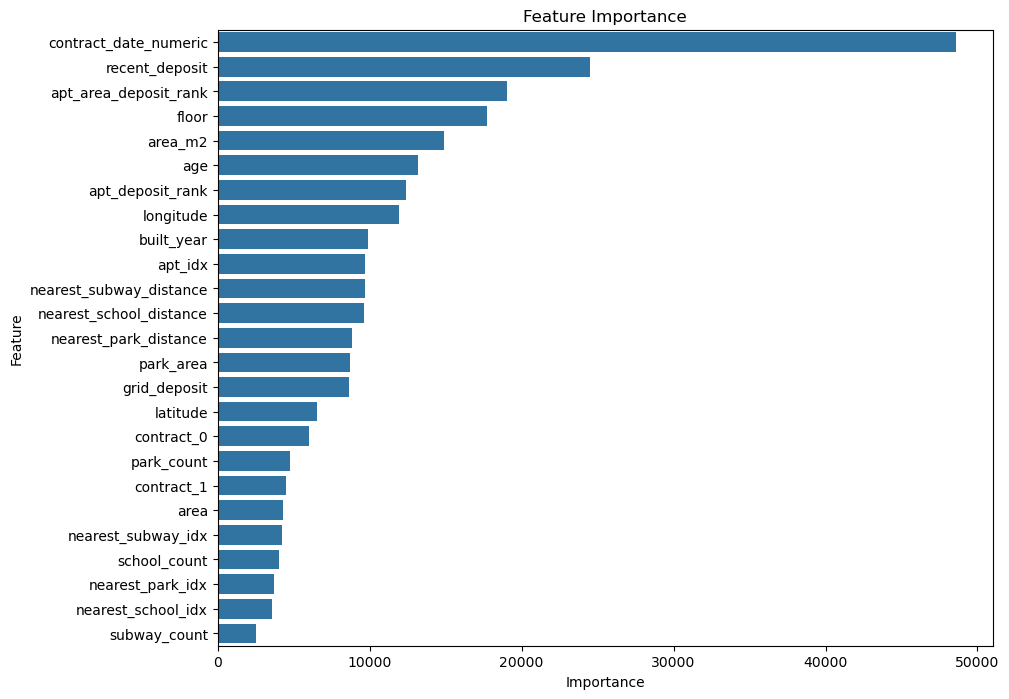

In [21]:
#Feature Importance
# 피처 중요도 추출
feature_importance = model.get_fscore()
# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [22]:
y_pred

array([23174.48 ,  7080.909,  6007.085, ..., 45237.953, 38058.59 ,
       38525.37 ], dtype=float32)

In [23]:
sample_submission['deposit'] = y_pred
sample_submission

,index,deposit
0,0,23174.480469
1,1,7080.909180
2,2,6007.084961
3,3,6111.806152
4,4,6479.200684
...,...,...
150167,150167,37639.843750
150168,150168,44034.597656
150169,150169,45237.953125
150170,150170,38058.589844


In [24]:
sample_submission.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,39294.285156
std,43351.06665,24372.753906
min,0.00000,2835.812988
25%,37542.75000,23355.395020
50%,75085.50000,34007.021484
75%,112628.25000,48619.085938
max,150171.00000,534889.812500


In [25]:
# sample_submission.to_csv('v8_xgb_5000.csv', index=False)

---